In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pile_df = pd.read_csv('evals_single.tsv', sep='\t')
pile_df = pile_df[pile_df["is_annotated"] & ~pile_df["corrupted"]]
pile_df["total_obj"] = [1] * len(pile_df)
pile_df.head()

,trial_id,run_path,giga_image,vrb_image,is_annotated,corrupted,num_same,giga_pos_modes,giga_dir_modes,giga_num_false_positives,vrb_pos_modes,vrb_dir_modes,vrb_num_false_positives,total_obj
0,23-12-08-21-09-40_round_001_trial_000,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,True,False,1.0,3.0,2.0,0.0,3.0,1.0,0.0,1
1,23-12-08-21-09-40_round_000_trial_000,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,True,False,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
2,23-12-08-21-09-25_round_000_trial_000,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,True,False,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1
3,23-12-08-21-09-41_round_001_trial_000,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,True,False,1.0,1.0,1.0,0.0,3.0,1.0,0.0,1
4,23-12-08-21-09-41_round_000_trial_000,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,/Users/ishangaur/affordance-bench/single_exp/2...,True,False,1.0,1.0,1.0,0.0,3.0,1.0,0.0,1


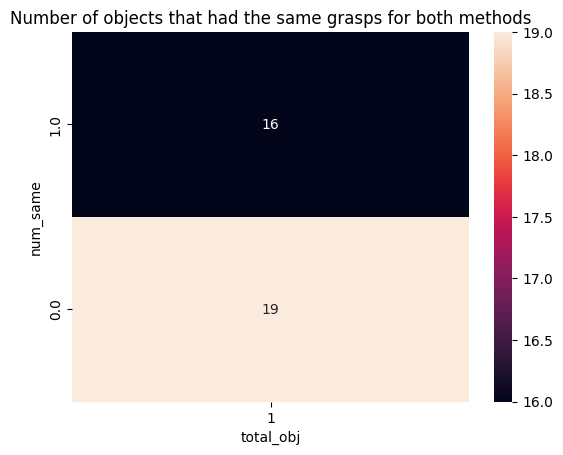

Text(0.5, 1.0, 'Proportion of Objects with Grasps for Both Methods ')

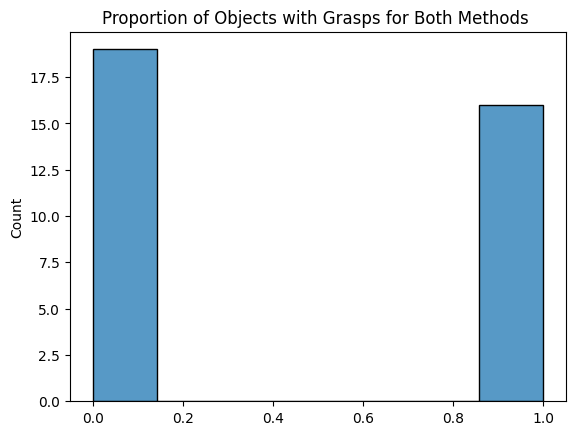

In [4]:
plt.clf()

# Create the 2D heatmap with counts annotated
heatmap = pile_df.pivot_table(index='num_same', columns='total_obj', aggfunc='size', fill_value=0)
sns.heatmap(heatmap, annot=True, fmt='d', cbar=True)

# Set the axis labels and tick labels
plt.xlabel('total_obj')
plt.ylabel('num_same')
plt.title("Number of objects that had the same grasps for both methods")
plt.gca().invert_yaxis()

# Show the plot
plt.show()
plt.clf()
sns.histplot(pile_df["num_same"] / pile_df["total_obj"])
plt.title("Proportion of Objects with Grasps for Both Methods ")

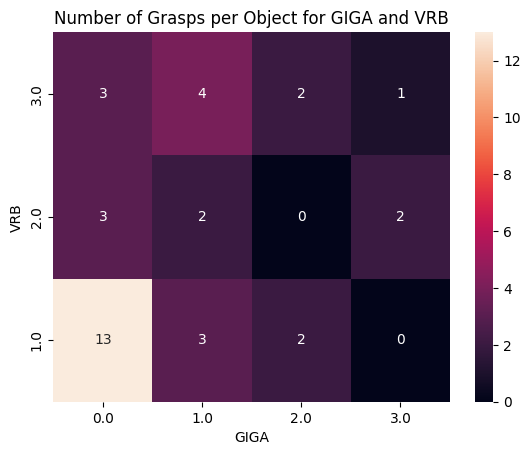

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to extract modes
def extract_modes(df, column_name):
    flattened_modes = []
    for modes_list in df[column_name]:
        # modes = modes_list.split(",")
        # modes = [int(mode) for mode in modes if mode != ""]
        # flattened_modes.extend(modes)
        flattened_modes.extend([modes_list])
    return flattened_modes

# Extract modes for giga_pos_modes and vrb_pos_modes
vrb_pos_modes = extract_modes(pile_df, "vrb_pos_modes")
giga_pos_modes = extract_modes(pile_df, "giga_pos_modes")

# Create a dataframe for the heatmap
heatmap_df = pd.DataFrame({'Giga': giga_pos_modes, 'Vrb': vrb_pos_modes})

# Create the 2D heatmap with counts annotated
heatmap = heatmap_df.pivot_table(index='Vrb', columns='Giga', aggfunc='size', fill_value=0)
sns.heatmap(heatmap, annot=True, fmt='d', cbar=True)

# Set the axis labels and tick labels
plt.xlabel('GIGA')
plt.ylabel('VRB')
plt.title('Number of Grasps per Object for GIGA and VRB')
plt.gca().invert_yaxis()

# Show the plot
plt.show()


In [7]:
giga_dir_modes = extract_modes(pile_df, "giga_dir_modes")
vrb_dir_modes = extract_modes(pile_df, "vrb_dir_modes")

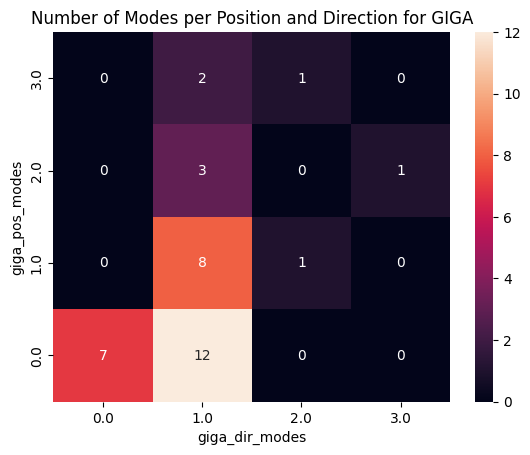

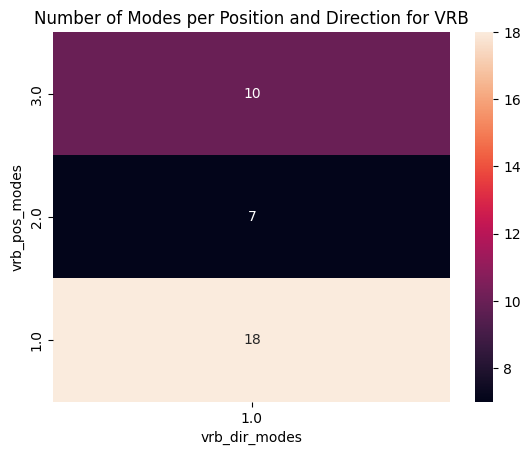

In [8]:
def plot_heatmap(df, x_data, y_data, x_col, y_col, title):
    # Create the dataframe for the heatmap
    heatmap_df = pd.DataFrame({x_col: x_data, y_col: y_data})

    # Create the 2D heatmap with counts annotated
    heatmap = heatmap_df.pivot_table(index=x_col, columns=y_col, aggfunc='size', fill_value=0)
    sns.heatmap(heatmap, annot=True, fmt='d', cbar=True)

    # Set the axis labels and tick labels
    plt.xlabel(y_col)
    plt.ylabel(x_col)
    plt.title(title)
    plt.gca().invert_yaxis()

    # Show the plot
    plt.show()

# Plot heatmap for GIGA
plot_heatmap(pile_df, giga_pos_modes, giga_dir_modes, 'giga_pos_modes', 'giga_dir_modes', 'Number of Modes per Position and Direction for GIGA')

# Plot heatmap for VRB
plot_heatmap(pile_df, vrb_pos_modes, vrb_dir_modes, 'vrb_pos_modes', 'vrb_dir_modes', 'Number of Modes per Position and Direction for VRB')
